In [29]:
from sentence_transformers import SentenceTransformer
import matplotlib.pyplot as plt
import io
from PIL import Image
import fitz
from PIL import Image, ImageDraw, ImageFont

In [2]:
img_model = SentenceTransformer('clip-ViT-B-32')

.gitattributes:   0%|          | 0.00/690 [00:00<?, ?B/s]

0_CLIPModel/config.json:   0%|          | 0.00/4.03k [00:00<?, ?B/s]

0_CLIPModel/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

0_CLIPModel/preprocessor_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/605M [00:00<?, ?B/s]

0_CLIPModel/special_tokens_map.json:   0%|          | 0.00/389 [00:00<?, ?B/s]

0_CLIPModel/tokenizer_config.json:   0%|          | 0.00/604 [00:00<?, ?B/s]

0_CLIPModel/vocab.json:   0%|          | 0.00/961k [00:00<?, ?B/s]

README.md:   0%|          | 0.00/1.88k [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

modules.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

In [11]:
num_parameters = sum(p.numel() for p in img_model.parameters())
print(f"Model has {num_parameters / 1e6} M parameters")

Model has 151.277313 M parameters


In [40]:
doc = fitz.open('../data/raw/Schaefer-Crimping-Machine-EPS-2001-STI2015-v5-de-web.pdf')
zoom = 1 # to increase the resolution
mat = fitz.Matrix(zoom, zoom)

doc_name = "Schaefer-Crimping-Machine-EPS-2001-STI2015-v5-de-web"  # Replace with your document name
font_size = 15  # Adjust font size as needed

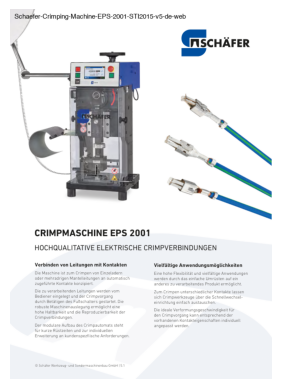

In [55]:
for page in doc:  # iterate through the pages
    pix = page.get_pixmap(matrix = mat)  # render page to an image
    image = Image.frombytes("RGB", [pix.width, pix.height], pix.samples)
    # Create a drawing context
    draw = ImageDraw.Draw(image)
    
    # Use a system font (Helvetica) available on Mac
    font = ImageFont.truetype("Helvetica", font_size)
    
    # Position for the text at the top left corner
    text_position = (10, 10)  # Small offset from the corner
    
    # Draw the text
    draw.text(text_position, doc_name, font=font, fill=(0, 0, 0))  # Black text
    img_embeddings = img_model.encode([image], normalize_embeddings=True)
    plt.imshow(image)
    plt.axis('off')  # Turn off axis numbers
    plt.show()
    break

In [56]:
img_embeddings.tolist()

[[-0.031753361225128174,
  0.009272296912968159,
  -0.013540824875235558,
  0.009520862251520157,
  0.04438959062099457,
  -0.01953376829624176,
  -0.0053697493858635426,
  -0.03995826095342636,
  0.013663324527442455,
  0.04301626980304718,
  0.030975665897130966,
  -0.049322690814733505,
  0.05581264570355415,
  0.03292079269886017,
  0.032992325723171234,
  -0.013804151676595211,
  0.150676891207695,
  0.019156530499458313,
  0.02786553092300892,
  -0.0013434677384793758,
  -0.03398268297314644,
  0.013025776483118534,
  -0.027835048735141754,
  0.06554463505744934,
  -0.03591567650437355,
  0.02570233680307865,
  0.06479797512292862,
  0.02343929372727871,
  0.011319170705974102,
  0.0031805310864001513,
  0.0027096637059003115,
  0.0640164166688919,
  -0.014774974435567856,
  0.004060514736920595,
  -0.004823266062885523,
  0.014403829351067543,
  -0.029462413862347603,
  0.006797778885811567,
  -0.052620045840740204,
  -0.15161798894405365,
  0.02722134254872799,
  -0.09721089899

In [57]:
import numpy as np
l2_norm = np.linalg.norm(img_embeddings[0])
print(l2_norm)

1.0
